# Demo-1 Task

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [206]:
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 20) 

In [207]:
df = pd.read_csv('./Automobile_price_data_Raw_set.csv')

In [208]:
df.shape

(205, 26)

In [209]:
df = df.dropna()

In [210]:
df.shape

(153, 26)

In [211]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
11,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0
12,0,188.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0
13,0,188.0,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
19,1,98.0,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6295.0


In [212]:
X_params = [
    'make',
    'body-style',
    'wheel-base',
    'engine-size',
    'horsepower',
    'peak-rpm',
    'highway-mpg'
]

Y_param = ['price']

In [213]:
learn_df = df[X_params + Y_param]

In [214]:
learn_df.sample(8)

,make,body-style,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price
148,subaru,wagon,96.9,108,82.0,4800.0,29,8013.0
201,volvo,sedan,109.1,141,160.0,5300.0,25,19045.0
65,mazda,sedan,104.9,140,120.0,5000.0,27,18280.0
132,saab,hatchback,99.1,121,110.0,5250.0,28,11850.0
166,toyota,hatchback,94.5,98,112.0,6600.0,29,9538.0
118,plymouth,hatchback,93.7,90,68.0,5500.0,41,5572.0
38,honda,hatchback,96.5,110,86.0,5800.0,33,9095.0
161,toyota,hatchback,95.7,98,70.0,4800.0,34,8358.0


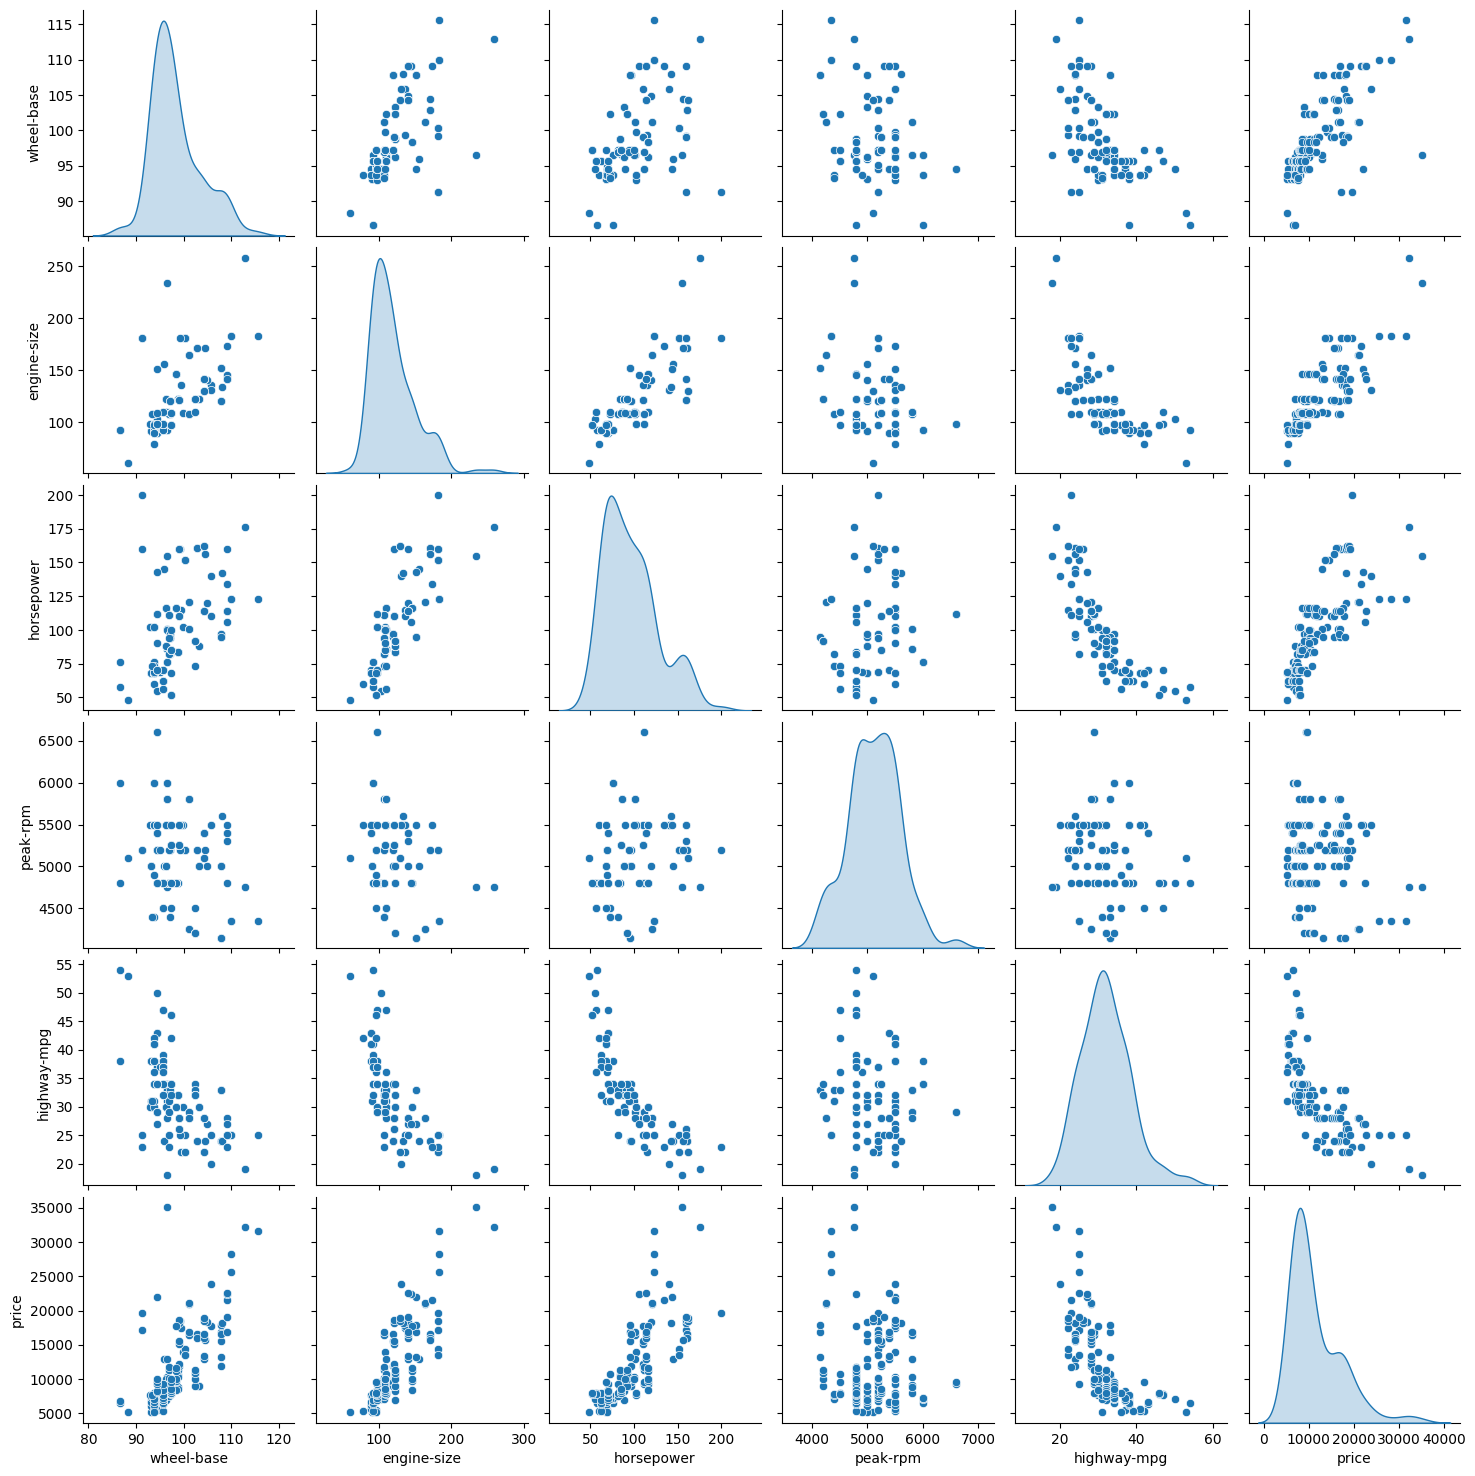

In [215]:
sns.pairplot(learn_df[X_params + Y_param], diag_kind='kde')
plt.show()

In [216]:
cat_arguments = learn_df.select_dtypes(include=['object']).columns
cat_arguments

Index(['make', 'body-style'], dtype='object')

In [217]:
for arg in cat_arguments:
    one_hot = pd.get_dummies(learn_df[arg])
    learn_df = learn_df.drop(arg, axis = 1)
    learn_df = learn_df.join(one_hot)

In [218]:
learn_df

,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,price,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,convertible,hardtop,hatchback,sedan,wagon
3,99.8,109,102.0,5500.0,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,99.4,136,115.0,5500.0,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,105.8,136,110.0,5500.0,25,17710.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,105.8,131,140.0,5500.0,20,23875.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,101.2,108,101.0,5800.0,29,16430.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,141,114.0,5400.0,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
201,109.1,141,160.0,5300.0,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
202,109.1,173,134.0,5500.0,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
203,109.1,145,106.0,4800.0,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [219]:
X = learn_df.drop(Y_param, axis=1)
y = learn_df[Y_param]

In [220]:
y

,price
3,13950.0
4,17450.0
6,17710.0
8,23875.0
10,16430.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [221]:
X

,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,convertible,hardtop,hatchback,sedan,wagon
3,99.8,109,102.0,5500.0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,99.4,136,115.0,5500.0,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,105.8,136,110.0,5500.0,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,105.8,131,140.0,5500.0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,101.2,108,101.0,5800.0,29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,141,114.0,5400.0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
201,109.1,141,160.0,5300.0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
202,109.1,173,134.0,5500.0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
203,109.1,145,106.0,4800.0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [223]:
print(f'{X_test.shape=}')
print(f'{y_test.shape=}')
print(f'{X_train.shape=}')
print(f'{y_train.shape=}')


X_test.shape=(46, 28)
y_test.shape=(46, 1)
X_train.shape=(107, 28)
y_train.shape=(107, 1)


## scikit-learn LinearRegression

In [224]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
Y_pred = sklearn_model.predict(X_test)

In [225]:
scikit_mae = mean_absolute_error(y_test,Y_pred)
scikit_mse = mean_squared_error(y_test,Y_pred)
scikit_rmse = np.sqrt(scikit_mse)
scikit_r2 = r2_score(y_test, Y_pred)

print("Results by scikit-learn LinearRegression:")
print(f"MAE: {scikit_mae}")
print(f"MSE: {scikit_mse}")
print(f"RMSE: {scikit_rmse}")
print(f"R-Squared: {scikit_r2}")

Results by scikit-learn LinearRegression:
MAE: 1749.3662467643987
MSE: 6502814.12729468
RMSE: 2550.0615928433335
R-Squared: 0.8374176514923443


In [226]:
X_train

,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,convertible,hardtop,hatchback,sedan,wagon
96,94.5,97,69.0,5200.0,37,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
81,96.3,122,88.0,5000.0,32,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
190,94.5,109,90.0,5500.0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
165,94.5,98,112.0,6600.0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
108,107.9,152,95.0,4150.0,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,104.3,141,114.0,5400.0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
137,99.1,121,160.0,5500.0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
149,96.9,108,111.0,4800.0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
101,100.4,181,152.0,5200.0,22,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


### Predict the “price” value for the following input: 

(make, body-style, wheel-base, engine-size, horsepower, peak-rpm, highway-mpg ) \
[ audi, hatchback, 99.5, 131, 160, 5500, 22 ]


In [227]:
make = [1] + [0 for _ in range(len(df['make'].unique()) - 1)]
len(make)

18

In [228]:
body_style = [0, 0, 1, 0, 0]
body_style

[0, 0, 1, 0, 0]

In [229]:
cols = learn_df.drop(Y_param, axis=1).columns
to_predict = [[99.5, 131.0, 160.0, 5500.0, 22.0, *make, *body_style]]

In [230]:
to_predict_df = pd.DataFrame(to_predict, columns=cols)
to_predict_df

,wheel-base,engine-size,horsepower,peak-rpm,highway-mpg,audi,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,convertible,hardtop,hatchback,sedan,wagon
0,99.5,131.0,160.0,5500.0,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## scikit-learn LinearRegression prediction

In [167]:
predicted_value = sklearn_model.predict(to_predict)
print(f"{predicted_value}")

[[21099.55040442]]


d:\Files\Documents\JYU\Deep-Learning for Cognitive Computing for Developers\Demos\Demo 1\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## DNN model building

In [236]:
import keras
from keras.layers import Dense, Normalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf

In [233]:
x_normalizer = tf.keras.layers.Normalization(axis=-1)
x_normalizer.adapt(np.array(X))

In [312]:
learning_rate = 0.001
epochs = 100
validation_split = 0.2

In [305]:
def build_and_compile_model(norm):
  model = Sequential([
      norm,
      Dense(512, activation='relu'),
      Dropout(0.5),
      Dense(256, activation='relu'),
      Dropout(0.25),
      Dense(10, activation='relu'),
      Dense(1)
  ])

  model.compile(
    loss='mean_absolute_error',
    optimizer=Adam(learning_rate)
  )
  return model

In [315]:
dnn_model = build_and_compile_model(x_normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 28)               57        
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 512)               14848     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                      

In [316]:
history = dnn_model.fit(
    X,
    y,
    validation_split=validation_split,
    verbose=0, 
    epochs=epochs
)

In [262]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()
  plt.grid(True)

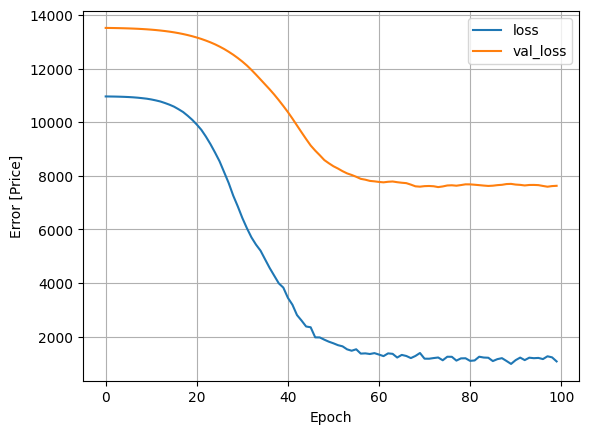

In [317]:
plot_loss(history)

In [327]:
MSE_DNN = dnn_model.evaluate(X_test, y_test, verbose=0)
MSE_DNN

2719.836669921875

## Check error distribution

2/2 [==============================] - 0s 2ms/step


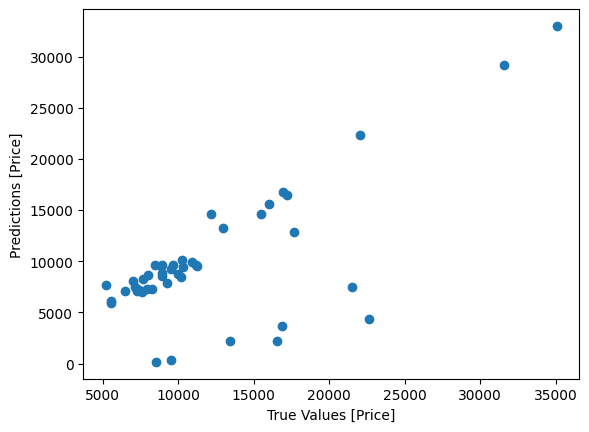

In [319]:
test_predictions = dnn_model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.show()

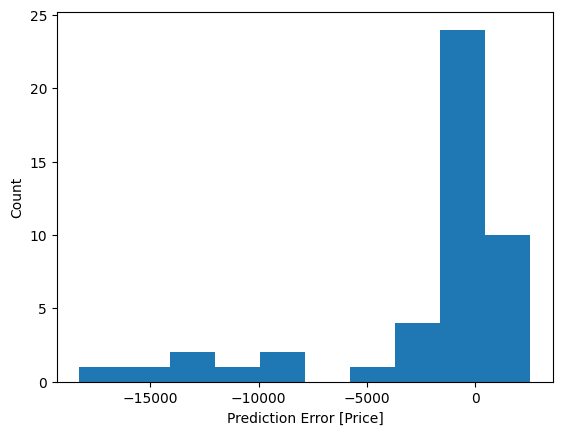

In [320]:
error = test_predictions - y_test['price']
plt.hist(error)
plt.xlabel('Prediction Error [Price]')
plt.ylabel('Count')
plt.show()

## DNN prediction

In [322]:
dnn_model.predict(to_predict_df)

1/1 [==============================] - 0s 26ms/step


array([[18280.053]], dtype=float32)